In [1]:
import numpy as np
import pickle 
import sys, os
sys.path.append("..")
from logger import Logger
import matplotlib.pyplot as plt

In [2]:
def get_logger(pth):
    with open(pth, 'rb') as f:
        logger = pickle.load(f)
    logger.train_loss = np.asarray(logger.train_loss)
    logger.train_conf = np.asarray(logger.train_conf)

    logger.valid_loss = np.asarray(logger.valid_loss)
    logger.valid_conf = np.asarray(logger.valid_conf)

    logger.test_loss = np.asarray(logger.test_loss)
    logger.test_conf = np.asarray(logger.test_conf)

    logger.elapsed_time = np.asarray(logger.elapsed_time)
    
    return logger

In [4]:
prefix = '../cva_sine_result_files/updatefinder100k_10000_40_0_1.pkl'
suffix = '_10000_25_0_1.pkl'
amnt = ['10', '100', '1000', '10000']

loggers = {}
for i in amnt:
    loggers[i] = get_logger(prefix+i+suffix)

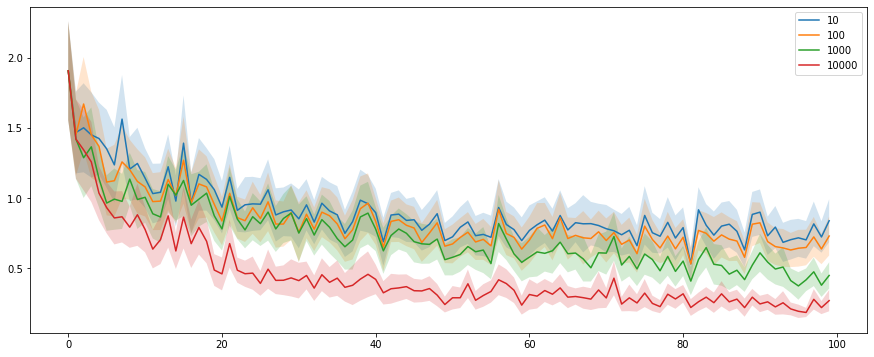

In [6]:
# plot the performance of everything
alpha = 0.2
for i, logger in loggers.items():
    x = [j for j in range(len(logger.test_loss))]
    plt.plot(x, logger.test_loss, label=i)
    plt.fill_between(x, logger.test_loss+logger.test_conf, logger.test_loss-logger.test_conf, alpha=alpha)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)
# plt.ylim(0,.5)
plt.show()

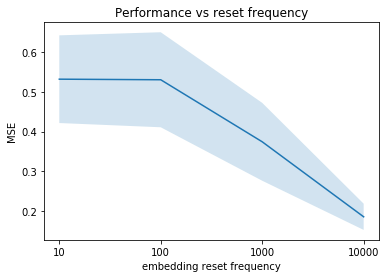

In [10]:
# plot in prettier format
y = []
ysd = []
for i in amnt:
    idx = np.argmin(loggers[i].test_loss)
    y.append(loggers[i].test_loss[idx])
    ysd.append(loggers[i].test_conf[idx])
y = np.asarray(y)
ysd = np.asarray(ysd)
plt.plot(amnt, y)
plt.fill_between(amnt, y+ysd, y-ysd, alpha=0.2)
plt.title('Performance vs reset frequency')
plt.ylabel('MSE')
plt.xlabel('embedding reset frequency')
plt.show()